# Wine Quality Classification
David Olah, Jesse Viehweger, and Matthew Stepan
***
Utilize scikit-learn and pandas to determine whether the quality of wine can be predicted from its chemical composition.

In [383]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sklearn
from sklearn import cluster
import pandas as pd
pd.plotting.register_matplotlib_converters()
from pandas.plotting import scatter_matrix
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from datetime import datetime

## Data Import and Manipulation
We used the White Wine Quality dataset from https://www.kaggle.com/piyushagni5/white-wine-quality.

In [384]:
pd.set_option("display.max_rows", 20)
wine = pd.read_csv("winequality-white.csv")
print(wine.shape)
print("The wine dataset has {} rows and {} columns.".format(wine.shape[0], wine.shape[1]))
#print(wine.head)

print(type(wine.quality.value_counts()))
wine.quality.value_counts()

(4898, 12)
The wine dataset has 4898 rows and 12 columns.
<class 'pandas.core.series.Series'>


6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

### Quality Distribution

<AxesSubplot:title={'center':'Quality Distribution'}>

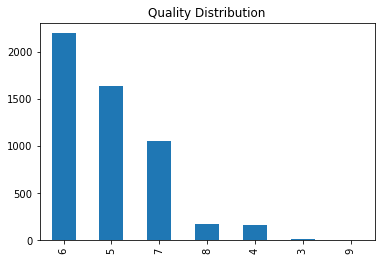

In [385]:
cut_labels_3 = ['1', '2', '3']
cut_bins = [0, 5, 6, 9]
wine['quality_type'] = pd.cut(wine['quality'], bins=cut_bins, labels=cut_labels_3)

wine.quality_type.value_counts().plot(kind="bar", title="Quality Distribution")
wine.quality.value_counts().plot(kind="bar")

### Attributes
While some of the data has a nice distribution, there are some attributes such as residual sugar that is noticeably biased. We will later perform scaling on the features we use in order to help offset this.

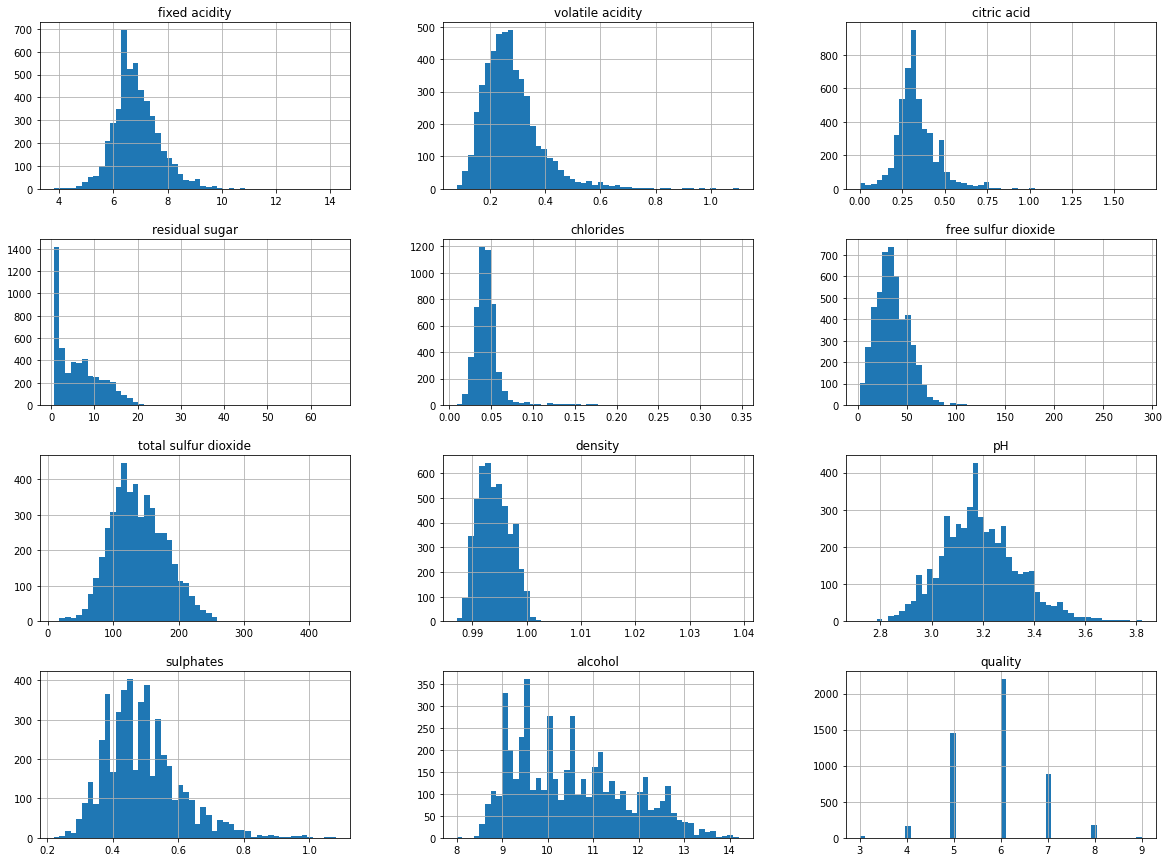

In [386]:
wine.hist(bins = 50, figsize = (20,15))
plt.show()

### Scatter Matrix
Compare each attribute with one another.

array([[<AxesSubplot:xlabel='fixed acidity', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='volatile acidity', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='citric acid', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='residual sugar', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='chlorides', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='free sulfur dioxide', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='total sulfur dioxide', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='density', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='pH', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='sulphates', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='alcohol', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='quality', ylabel='fixed acidity'>],
       [<AxesSubplot:xlabel='fixed acidity', ylabel='volatile acidity'>,
        <AxesSubplot:xlabel='volatile acidity', ylabel='volatile acidity'>,
        <AxesSubplot:xlabel='cit

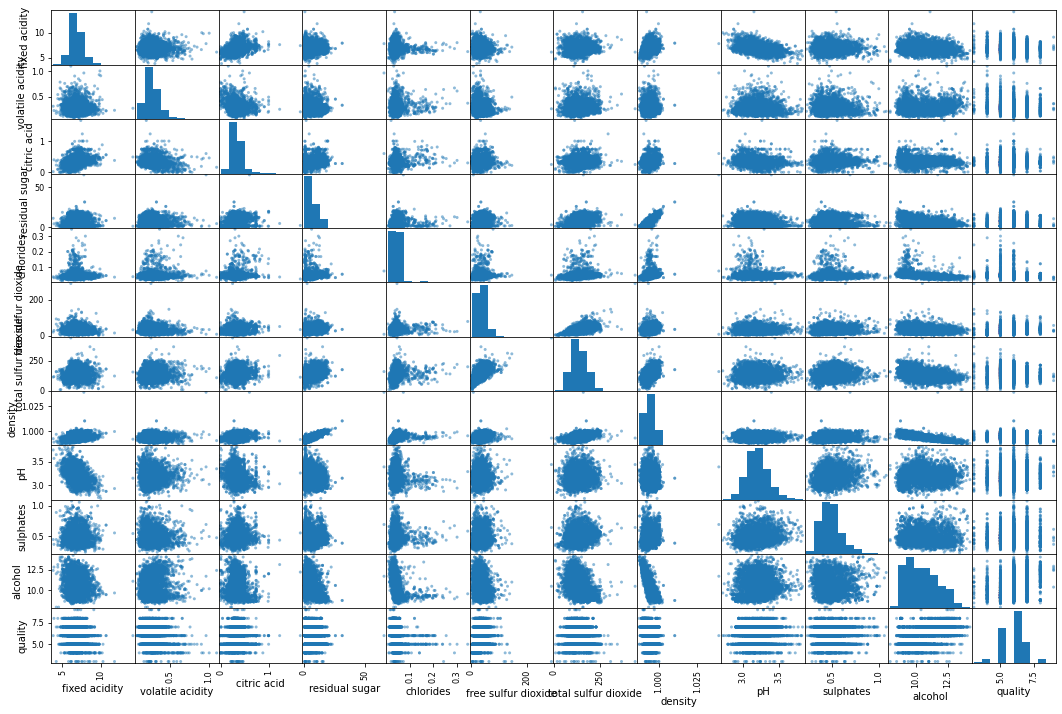

In [387]:
attributes=[ "fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality"]
scatter_matrix( wine[attributes], figsize = (18,12))

### Heatmap
A more effective visualization compared to the scatterplot for determining correlations. The heatmap visualizes the correlation from 0-1.

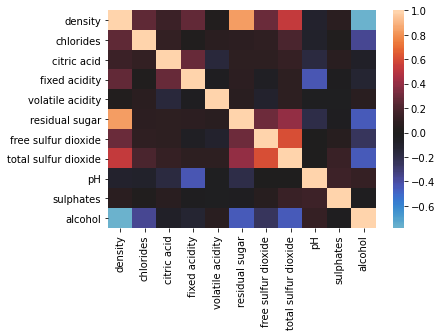

In [388]:
sns.heatmap(X.corr(), center=0);

## Clustering
Based off of the diversity of distributions in the above graphs, we were hopeful that clustering may help to show the distinction between wine qualities.

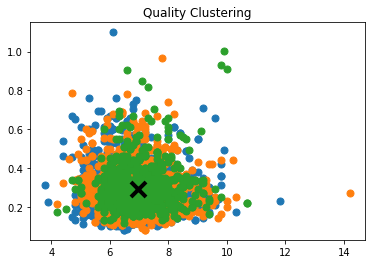

In [389]:
winery = np.array(wine)

k = 3
kmeans = cluster.KMeans( n_clusters=k)
kmeans.fit(winery)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, random_state=None, tol=0.0001, verbose=0)

# labels are the cluster the point belongs to. 
labels = kmeans.labels_
# Centroids are the center of the cluster. 
centroids = kmeans.cluster_centers_

for i in range(k):
    # select only data observations with cluster label == i
    ds = winery[np.where(labels==i)]
    # plot the data observations
    plt.plot(ds[:,0],ds[:,1],'o', markersize=7)
    # plot the centroids
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=4.0)
plt.title("Quality Clustering")
plt.show()

Unfortunately, as seen by the graph above, this was a non-starter.

<br>

## Split Data
Set up 70% training - 30% testing data split.

In [390]:
feature_cols = ['density', 'chlorides', 'citric acid', 'fixed acidity', 'volatile acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol']

X = wine[feature_cols] # Features
y = wine.quality_type # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

## Pipeline Start

In [391]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor 
from sklearn import svm
from sklearn import tree

Based on the labeled categorical data, we decided to try 3 different classification models to train our data. This initial run does not scale the data in any way.

In [392]:
pipe_rf = Pipeline([('clf', RandomForestClassifier(random_state=42))])

pipe_svm = Pipeline([('clf', svm.SVC(random_state=42))])

pipe_tree = Pipeline([('clf', tree.DecisionTreeClassifier(random_state=42))])

pipelines = [pipe_rf, pipe_svm, pipe_tree]
pipeline_names = ['Random Forest', 'Support Vector Machine', 'Decision Tree']

In [393]:
# Loop to fit each of the three pipelines
pipe_initial_pred = []
pipe_initial_scores = []
pipe_initial_clf = []
for pipe in pipelines:
    clf = pipe.fit(X_train, y_train)
    
    #for end comparison
    y_pred = clf.predict(X_test)
    pipe_initial_pred.append(y_pred)
    pipe_initial_scores.append(pipe.score(X_test, y_test))
    pipe_initial_clf.append(pipe)


# Compare accuracies
for index, val in enumerate(pipelines):
    # print('%s pipeline test accuracy: %.3f' % (pipeline_names[index], val.score(X_test, y_test)))
    print('%s pipeline test accuracy: %.3f' % (pipeline_names[index], val.score(X_test, y_test)))

Random Forest pipeline test accuracy: 0.701
Support Vector Machine pipeline test accuracy: 0.468
Decision Tree pipeline test accuracy: 0.639


The Random Forest Classifcation is the best performing model.

<br>

## GridSearchCV
To try and improve on these results, we used the GridSearchCV module to search over a range of parameters for each estimator (model).
The standard scaling was also implemented at this phase.

*This takes 1-2 minutes to run, machine dependent.

In [394]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix

param_list = []
#RandomForest parameters
param_list.append([ 
  {
  'rf__n_estimators' : [10, 50, 100],
  'rf__max_depth' : [5, 10, 25],
  'rf__min_samples_split' : [2, 10, 25],
  'rf__min_samples_leaf' : [1, 5, 10] 
  }
])
#SVM parameters
param_list.append([
  {
  'scl__C': [0.001, 0.1, 1,5], 
  'scl__kernel':['rbf'], 
  'scl__gamma':[0.01, 0.05]
  }
])
#DecisionTree parameter
param_list.append([
  {
    'dt__criterion' : ['gini', 'entropy'],
    'dt__max_depth' : [2, 5, 10, 20]
  }
])

pipe_rf = Pipeline([('scaler', StandardScaler()),
            ('rf', RandomForestClassifier(random_state=42))])

pipe_svm = Pipeline([('scaler', StandardScaler()),
            ('scl', svm.SVC(random_state=42))])

pipe_tree = Pipeline([('scaler', StandardScaler()),
            ('dt', tree.DecisionTreeClassifier(random_state=42))])      
      

pipelinesCV = [pipe_rf, pipe_svm, pipe_tree]
pipeline_names = ['Random Forest', 'Support Vector Machine', 'Decision Tree']
pipeline_scores = []
pipeline_predict = []
pipeline_clf = []

for count, pipe in enumerate(pipelinesCV):
  print('Classifier:', pipeline_names[count])
  gs_rf = GridSearchCV(estimator=pipe,
          #param_grid=param_grids,
          param_grid=param_list[count],
          scoring='accuracy',
          cv=3, verbose=False, return_train_score = True)
  #GridSearchCV automatically splits training data 
  #https://stackoverflow.com/questions/51459406/how-to-apply-standardscaler-in-pipeline-in-scikit-learn-sklearn
  clf = gs_rf.fit(X, y) 
  # clf = gs_rf.fit(X_train, y_train)  


  print('Best Score: %.3f' % gs_rf.best_score_)
  print('Best Estimators:', gs_rf.best_estimator_)
  print('Best Parameters:', gs_rf.best_params_)
  print('\n')

  y_pred = clf.predict(X_test)
  pipeline_scores.append(gs_rf.best_score_)
  pipeline_predict.append(y_pred)
  pipeline_clf.append(gs_rf)

Classifier: Random Forest
Best Score: 0.570
Best Estimators: Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestClassifier(max_depth=10, n_estimators=50,
                                        random_state=42))])
Best Parameters: {'rf__max_depth': 10, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 50}


Classifier: Support Vector Machine
Best Score: 0.559
Best Estimators: Pipeline(steps=[('scaler', StandardScaler()),
                ('scl', SVC(C=1, gamma=0.05, random_state=42))])
Best Parameters: {'scl__C': 1, 'scl__gamma': 0.05, 'scl__kernel': 'rbf'}


Classifier: Decision Tree
Best Score: 0.525
Best Estimators: Pipeline(steps=[('scaler', StandardScaler()),
                ('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        random_state=42))])
Best Parameters: {'dt__criterion': 'entropy', 'dt__max_depth': 5}




## Results

It was surprising that even after hours of tweaking, including large parameter values, that the GridSearchCV results did not outperform the basic implementations of the classifiers.

The scaler was removed from the pipeline to see if that was causing the issue, but no discernable difference in results was noticed.

### GridSearchCV Models


GridSearchCV Models:

             pred:low  pred:medium  pred:high
true:low          404           75          2
true:medium        40          601         14
true:high           6           82        246
Best score:  Random Forest  =  0.5702310445509088


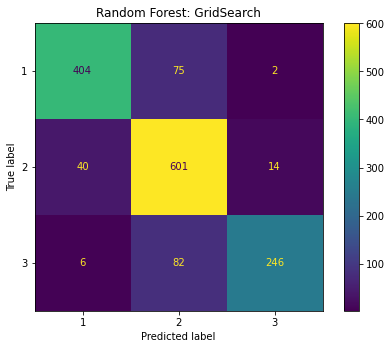



             pred:low  pred:medium  pred:high
true:low          303          173          5
true:medium       123          486         46
true:high          11          187        136
Best score:  Support Vector Machine  =  0.5592063856569368


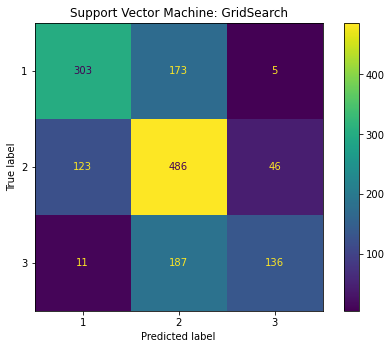



             pred:low  pred:medium  pred:high
true:low          291          183          7
true:medium       147          469         39
true:high          11          229         94
Best score:  Decision Tree  =  0.5251127931270487


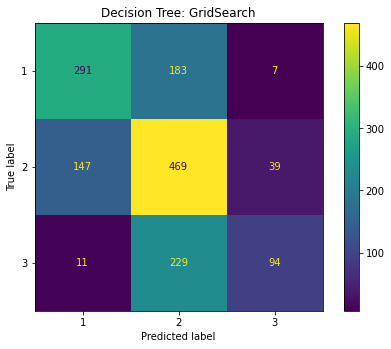

In [395]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
best_score = 0

print('\nGridSearchCV Models:\n')
#GridSearch
for i in range(len(pipeline_names)):
  conf = pd.DataFrame(
    confusion_matrix( y_test, pipeline_predict[i]), 
    index=['true:low', 'true:medium', 'true:high'], 
    columns=['pred:low', 'pred:medium', 'pred:high']
  )
  print(conf)
  print('Best score: ', pipeline_names[i], ' = ', pipeline_scores[i])
  if(pipeline_scores[i] > best_score):
    best_score = pipeline_scores[i]
    best_name = pipeline_names[i] + ': GridSearchCV'
  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  plot_confusion_matrix(pipeline_clf[i], X_test, y_test,ax=ax)
  plt.title(pipeline_names[i] + ': GridSearch')
  plt.show()
  print('\n')

### Initial Pipeline Models



             pred:low  pred:medium  pred:high
true:low          332          142          7
true:medium       109          492         54
true:high           5          123        206
Best score  Random Forest  =  0.7006802721088435


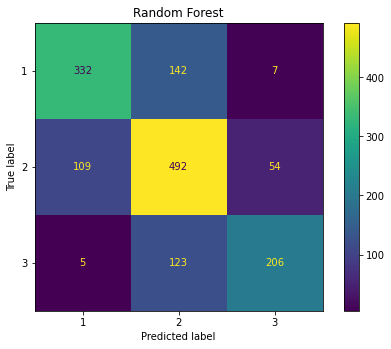



             pred:low  pred:medium  pred:high
true:low          167          314          0
true:medium       134          521          0
true:high          28          306          0
Best score  Support Vector Machine  =  0.46802721088435373


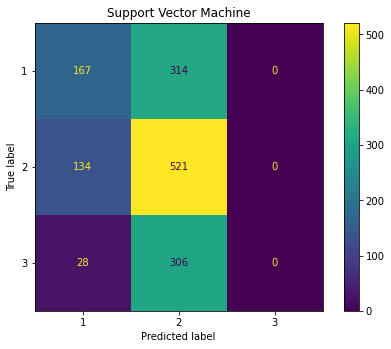



             pred:low  pred:medium  pred:high
true:low          307          149         25
true:medium       116          431        108
true:high          33           99        202
Best score  Decision Tree  =  0.6394557823129252


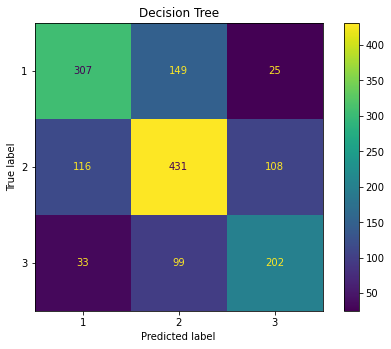

In [396]:
#Initial Pipeline
print('\n')
for i in range(len(pipeline_names)):
  conf = pd.DataFrame(
  confusion_matrix( y_test, pipe_initial_pred[i]), 
  index=['true:low', 'true:medium', 'true:high'], 
  columns=['pred:low', 'pred:medium', 'pred:high']
  )
  print(conf)
  print('Best score ', pipeline_names[i], ' = ', pipe_initial_scores[i])
  if(pipe_initial_scores[i] > best_score):
    best_name = pipeline_names[i]
    best_score = pipe_initial_scores[i]
  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  plot_confusion_matrix(pipe_initial_clf[i], X_test, y_test,ax=ax)
  plt.title(pipeline_names[i])
  plt.ticklabel_format()
  plt.show()
  print('\n')

## Best overall

In [397]:
print('\nBest accuracy: ', best_name, '=', best_score)


Best accuracy:  Random Forest = 0.7006802721088435
